## World Development Indicators - Analytics

In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.plotly as py
import plotly.graph_objs as go
import time

datos = pd.read_csv("suramerica.csv").drop('Unnamed: 0', 1)
datos.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
0,Antigua and Barbuda,ATG,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,1960,126.144000
1,Antigua and Barbuda,ATG,Age dependency ratio (% of working-age populat...,SP.POP.DPND,1960,88.237117
2,Antigua and Barbuda,ATG,"Age dependency ratio, old (% of working-age po...",SP.POP.DPND.OL,1960,7.779958
3,Antigua and Barbuda,ATG,"Age dependency ratio, young (% of working-age ...",SP.POP.DPND.YG,1960,80.457159
4,Antigua and Barbuda,ATG,"Birth rate, crude (per 1,000 people)",SP.DYN.CBRT.IN,1960,32.920000


In [54]:
paises = ['Antigua and Barbuda','Argentina','Aruba','Bahamas, The','Barbados','Belize','Bolivia','Brazil','Cayman Islands','Chile','Colombia','Costa Rica','Cuba','Curacao','Dominica','Dominican Republic','Ecuador','El Salvador','Grenada','Guatemala','Guyana','Haiti','Honduras','Jamaica','Mexico','Nicaragua','Panama','Paraguay','Peru','Puerto Rico','Sint Maarten (Dutch part)','St. Kitts and Nevis','St. Lucia','St. Martin (French part)','St. Vincent and the Grenadines','Suriname','Trinidad and Tobago','Turks and Caicos Islands','Uruguay','Venezuela, RB','Virgin Islands (U.S.)']
years = range(2008,2012+1)

agricultura = ['EG.ELC.ACCS.RU.ZS','EG.NSF.ACCS.RU.ZS','AG.LND.IRIG.AG.ZS','AG.LND.AGRI.ZS','AG.LND.AGRI.K2','AG.AGR.TRAC.NO','AG.LND.TRAC.ZS','EN.ATM.METH.AG.ZS','EN.ATM.METH.AG.KT.CE','EN.ATM.NOXE.AG.ZS','EN.ATM.NOXE.AG.KT.CE','TX.VAL.AGRI.ZS.UN','TM.VAL.AGRI.ZS.UN','EA.PRD.AGRI.KD','NV.AGR.TOTL.ZS','NV.AGR.TOTL.CD','ER.H2O.FWAG.ZS','AG.LND.ARBL.ZS','AG.LND.ARBL.HA.PC','AG.LND.ARBL.HA','AG.LND.PRCP.MM','AG.PRD.CREL.MT','AG.YLD.CREL.KG','AG.PRD.CROP.XD','SL.AGR.EMPL.ZS','SL.AGR.EMPL.FE.ZS','SL.AGR.EMPL.MA.ZS','AG.CON.FERT.PT.ZS','AG.CON.FERT.ZS','AG.PRD.FOOD.XD','AG.LND.FRST.ZS','AG.LND.FRST.K2','SH.STA.ACSN.RU','SH.H2O.SAFE.RU.ZS','AG.LND.TOTL.K2','AG.LND.CREL.HA','AG.PRD.LVSK.XD','AG.LND.CROP.ZS','AG.LND.TOTL.RU.K2','AG.LND.EL5M.RU.ZS','AG.LND.EL5M.RU.K2','SP.RUR.TOTL','SP.RUR.TOTL.ZS','SP.RUR.TOTL.ZG','EN.POP.EL5M.RU.ZS','SI.POV.RUGP','SI.POV.RUHC','AG.SRF.TOTL.K2']
economia = ['PA.NUS.PPP.05','PA.NUS.PRVT.PP.05','NY.ADJ.NNTY.KD.ZG','NY.ADJ.NNTY.KD','NY.ADJ.NNTY.CD','NY.ADJ.NNTY.PC.KD.ZG','NY.ADJ.NNTY.PC.KD','NY.ADJ.NNTY.PC.CD','NY.ADJ.SVNX.GN.ZS','NY.ADJ.SVNX.CD','NY.ADJ.SVNG.GN.ZS','NY.ADJ.SVNG.CD','NY.ADJ.DCO2.GN.ZS','NY.ADJ.DCO2.CD','NY.ADJ.DKAP.GN.ZS','NY.ADJ.DKAP.CD','NY.ADJ.AEDU.GN.ZS','NY.ADJ.AEDU.CD','NY.ADJ.DNGY.GN.ZS','NY.ADJ.DNGY.CD','NY.ADJ.ICTR.GN.ZS','NY.ADJ.DMIN.GN.ZS','NY.ADJ.DMIN.CD','NY.ADJ.DRES.GN.ZS','NY.ADJ.DFOR.GN.ZS','NY.ADJ.DFOR.CD','NY.ADJ.NNAT.GN.ZS','NY.ADJ.NNAT.CD','NY.ADJ.DPEM.GN.ZS','NY.ADJ.DPEM.CD','NV.AGR.TOTL.ZS','NV.AGR.TOTL.KD.ZG','NV.AGR.TOTL.KD','NV.AGR.TOTL.KN','NV.AGR.TOTL.CN','NV.AGR.TOTL.CD','GC.DOD.TOTL.GD.ZS','NE.GDI.STKB.KN','NE.GDI.STKB.CN','NE.GDI.STKB.CD','BM.GSR.ROYL.CD','BX.GSR.ROYL.CD','NV.MNF.CHEM.ZS.UN','BX.GSR.CMCP.ZS','BM.GSR.CMCP.ZS','BN.CAB.XOKA.GD.ZS','BN.CAB.XOKA.CD','PA.NUS.ATLS','NY.GDP.DISC.KN','NY.GDP.DISC.CN','GC.XPN.TOTL.GD.ZS','NY.EXP.CAPM.KN','NE.EXP.GNFS.ZS','BX.GSR.GNFS.CD','NE.EXP.GNFS.KD.ZG','NE.EXP.GNFS.KD','NE.EXP.GNFS.KN','NE.EXP.GNFS.CN','NE.EXP.GNFS.CD','BX.GSR.TOTL.CD','NE.RSB.GNFS.ZS','NE.RSB.GNFS.KN','NE.RSB.GNFS.CN','NE.RSB.GNFS.CD','DT.DOD.DECT.GN.ZS','DT.DOD.DECT.EX.ZS','DT.DOD.DECT.CD','NE.CON.TOTL.KD','NE.CON.TOTL.KN','NE.CON.TOTL.CN','NE.CON.TOTL.CD','NE.CON.TETC.ZS','NE.CON.TETC.KD.ZG','NE.CON.TETC.KD','NE.CON.TETC.KN','NE.CON.TETC.CN','NE.CON.TETC.CD','NV.MNF.FBTO.ZS.UN','BN.KLT.DINV.CD','BX.KLT.DINV.WD.GD.ZS','BX.KLT.DINV.CD.WD','BM.KLT.DINV.WD.GD.ZS','BM.KLT.DINV.CD.WD','NY.GDP.MKTP.KN','NY.GDP.MKTP.CN','NY.GDP.MKTP.CD','NY.GDP.MKTP.KD','NY.GDP.DEFL.ZS','NY.GDP.MKTP.KD.ZG','NY.GDP.PCAP.KD','NY.GDP.PCAP.KN','NY.GDP.PCAP.CN','NY.GDP.PCAP.CD','NY.GDP.PCAP.KD.ZG','NY.GDP.PCAP.PP.KD','NY.GDP.PCAP.PP.CD','NY.GDP.MKTP.PP.KD','NY.GDP.MKTP.PP.CD','NY.GNP.MKTP.KD','NY.GNP.MKTP.KN','NY.GNP.MKTP.CN','NY.GNP.MKTP.CD','NY.GNP.MKTP.KD.ZG','NY.GNP.PCAP.KD','NY.GNP.PCAP.KN','NY.GNP.PCAP.CN','NY.GNP.PCAP.KD.ZG','NY.GNP.PCAP.CD','NY.GNP.PCAP.PP.KD','NY.GNP.PCAP.PP.CD','NY.GNP.ATLS.CD','NY.GNP.MKTP.PP.KD','NY.GNP.MKTP.PP.CD','NE.CON.GOVT.ZS','NE.CON.GOVT.KD.ZG','NE.CON.GOVT.KD','NE.CON.GOVT.KN','NE.CON.GOVT.CN','NE.CON.GOVT.CD','BX.GSR.MRCH.CD','BM.GSR.MRCH.CD','BX.GRT.EXTA.CD.WD','NE.GDI.TOTL.ZS','NE.GDI.TOTL.KD.ZG','NE.GDI.TOTL.KD','NE.GDI.TOTL.KN','NE.GDI.TOTL.CN','NE.GDI.TOTL.CD','NY.GDY.TOTL.KN','NY.GDS.TOTL.ZS','NY.GDS.TOTL.CN','NY.GDS.TOTL.CD','NE.GDI.FTOT.ZS','NE.GDI.FTOT.KD.ZG','NE.GDI.FTOT.KD','NE.GDI.FTOT.KN','NE.GDI.FTOT.CN','NE.GDI.FTOT.CD','NE.GDI.FPRV.ZS','NE.GDI.FPRV.CN','NE.DAB.TOTL.ZS','NE.DAB.TOTL.KD','NE.DAB.TOTL.KN','NE.DAB.TOTL.CN','NE.DAB.TOTL.CD','NE.DAB.DEFL.ZS','NY.GNS.ICTR.ZS','NY.GNS.ICTR.GN.ZS','NY.GNS.ICTR.CN','NY.GNS.ICTR.CD','NY.GDP.FCST.KD','NY.GDP.FCST.KN','NY.GDP.FCST.CN','NY.GDP.FCST.CD','NE.CON.PRVT.KD.ZG','NE.CON.PRVT.KD','NE.CON.PRVT.KN','NE.CON.PRVT.CN','NE.CON.PRVT.CD','NE.CON.PRVT.PC.KD','NE.CON.PRVT.PC.KD.ZG','NE.CON.PRVT.PP.KD','NE.CON.PRVT.PP.CD','NE.CON.PETC.ZS','NE.CON.PETC.KD.ZG','NE.CON.PETC.KD','NE.CON.PETC.KN','NE.CON.PETC.CN','NE.CON.PETC.CD','BX.GSR.CCIS.ZS','BX.GSR.CCIS.CD','NE.IMP.GNFS.ZS','BM.GSR.GNFS.CD','NE.IMP.GNFS.KD.ZG','NE.IMP.GNFS.KD','NE.IMP.GNFS.KN','NE.IMP.GNFS.CN','NE.IMP.GNFS.CD','BM.GSR.TOTL.CD','NV.IND.TOTL.ZS','NV.IND.TOTL.KD.ZG','NV.IND.TOTL.KD','NV.IND.TOTL.KN','NV.IND.TOTL.CN','NV.IND.TOTL.CD','NY.GDP.DEFL.KD.ZG','FP.CPI.TOTL.ZG','BX.GSR.INSF.ZS','BM.GSR.INSF.ZS','DT.INT.DECT.GN.ZS','DT.INT.DECT.EX.ZS','NV.MNF.MTRN.ZS.UN','NV.IND.MANF.ZS','NV.IND.MANF.KD.ZG','NV.IND.MANF.KD','NV.IND.MANF.KN','NV.IND.MANF.CN','NV.IND.MANF.CD','DT.ODA.ODAT.GN.ZS','DT.ODA.ODAT.PC.ZS','BN.TRF.KOGT.CD','NY.TRF.NCTR.KN','NY.TRF.NCTR.CN','NY.TRF.NCTR.CD','BN.KAC.EOMS.CD','BN.FIN.TOTL.CD','NY.GSR.NFCY.KN','NY.GSR.NFCY.CN','NY.GSR.NFCY.CD','DT.ODA.ODAT.CD','BN.GSR.FCTY.CD','BN.TRF.CURR.CD','NY.TAX.NIND.KN','NY.TAX.NIND.CN','NY.TAX.NIND.CD','BN.GSR.MRCH.CD','BN.GSR.GNFS.CD','NV.MNF.OTHR.ZS.UN','PA.NUS.PPP','PA.NUS.PRVT.PP','BM.TRF.PWKR.CD.DT','BX.TRF.PWKR.DT.GD.ZS','BX.TRF.PWKR.CD.DT','BX.TRF.PWKR.CD','BN.KLT.PTXL.CD','BX.PEF.TOTL.CD.WD','DT.DOD.PVLX.GN.ZS','DT.DOD.PVLX.EX.ZS','DT.DOD.PVLX.CD','PA.NUS.PPPC.RF','BX.KLT.DREM.CD.DT','BM.GSR.FCTY.CD','BX.GSR.FCTY.CD','BN.RES.INCL.CD','GC.REV.XGRT.GD.ZS','BX.TRF.CURR.CD','BM.TRF.PRVT.CD','BX.GSR.NFSV.CD','BM.GSR.NFSV.CD','NV.SRV.TETC.ZS','NV.SRV.TETC.KD.ZG','NV.SRV.TETC.KD','NV.SRV.TETC.KN','NV.SRV.TETC.CN','NV.SRV.TETC.CD','DT.DOD.DSTC.XP.ZS','DT.DOD.DSTC.IR.ZS','BX.GRT.TECH.CD.WD','NY.TTF.GNFS.KN','NV.MNF.TXTL.ZS.UN','DT.TDS.DECT.GN.ZS','DT.TDS.DECT.EX.ZS','FI.RES.TOTL.CD','FI.RES.XGLD.CD','NE.TRD.GNFS.ZS','BG.GSR.NFSV.GD.ZS','BX.GSR.TRAN.ZS','BM.GSR.TRAN.ZS','BX.GSR.TRVL.ZS','BM.GSR.TRVL.ZS']
educacion = ['SE.PRM.TENR.FE','SE.PRM.TENR.MA','SE.PRM.TENR','SE.SEC.UNER.LO.ZS','SE.SEC.UNER.LO.FE.ZS','SE.SEC.UNER.LO.MA.ZS','SE.ADT.LITR.ZS','SE.XPD.MPRM.ZS','SE.XPD.MSEC.ZS','SE.XPD.MTER.ZS','SE.XPD.MTOT.ZS','SE.PRM.UNER.ZS','SE.PRM.UNER.FE.ZS','SE.PRM.UNER.MA.ZS','SE.PRM.UNER.FE','SE.PRM.UNER.MA','SE.XPD.CPRM.ZS','SE.XPD.CSEC.ZS','SE.XPD.CTER.ZS','SE.XPD.CTOT.ZS','SE.COM.DURS','SE.TER.CUAT.DO.FE.ZS','SE.TER.CUAT.DO.MA.ZS','SE.TER.CUAT.DO.ZS','SE.TER.CUAT.BA.FE.ZS','SE.TER.CUAT.BA.MA.ZS','SE.TER.CUAT.BA.ZS','SE.TER.CUAT.MS.FE.ZS','SE.TER.CUAT.MS.MA.ZS','SE.TER.CUAT.MS.ZS','SE.SEC.CUAT.LO.FE.ZS','SE.SEC.CUAT.LO.MA.ZS','SE.SEC.CUAT.LO.ZS','SE.SEC.CUAT.PO.FE.ZS','SE.SEC.CUAT.PO.MA.ZS','SE.SEC.CUAT.PO.ZS','SE.PRM.CUAT.FE.ZS','SE.PRM.CUAT.MA.ZS','SE.PRM.CUAT.ZS','SE.TER.CUAT.ST.FE.ZS','SE.TER.CUAT.ST.MA.ZS','SE.TER.CUAT.ST.ZS','SE.SEC.CUAT.UP.FE.ZS','SE.SEC.CUAT.UP.MA.ZS','SE.SEC.CUAT.UP.ZS','SE.SEC.PROG.ZS','SM.EMI.TERT.ZS','SE.PRM.ENRL','SE.SEC.ENRL','SE.SEC.ENRL.GC','SE.SEC.ENRL.VO','SE.XPD.TOTL.GB.ZS','SE.XPD.PRIM.ZS','SE.XPD.SECO.ZS','SE.XPD.TERT.ZS','SE.XPD.TOTL.GD.ZS','SE.XPD.PRIM.PC.ZS','SE.XPD.SECO.PC.ZS','SE.XPD.TERT.PC.ZS','SE.PRM.ENRR','SE.PRE.ENRR','SE.PRE.ENRR.FE','SE.PRE.ENRR.MA','SE.SEC.ENRR','SE.TER.ENRR','SE.PRM.GINT.ZS','SE.PRM.GINT.FE.ZS','SE.PRM.GINT.MA.ZS','SL.TLF.PRIM.ZS','SL.TLF.PRIM.FE.ZS','SL.TLF.PRIM.MA.ZS','SL.TLF.SECO.ZS','SL.TLF.SECO.FE.ZS','SL.TLF.SECO.MA.ZS','SL.TLF.TERT.ZS','SL.TLF.TERT.FE.ZS','SL.TLF.TERT.MA.ZS','SL.TLF.TOTL.FE.ZS','SL.TLF.TOTL.IN','SE.ADT.LITR.FE.ZS','SE.ADT.LITR.MA.ZS','SE.ADT.1524.LT.FM.ZS','SE.ADT.1524.LT.FE.ZS','SE.ADT.1524.LT.MA.ZS','SE.SEC.CMPT.LO.FE.ZS','SE.SEC.CMPT.LO.MA.ZS','SE.SEC.CMPT.LO.ZS','SE.PRM.NENR','SE.SEC.NENR','SE.PRM.NINT.FE.ZS','SE.PRM.NINT.MA.ZS','SE.PRM.NINT.ZS','SE.SEC.AGES','SE.PRM.AGES','SE.PRM.UNER','SE.PRM.OENR.ZS','SE.PRM.OENR.FE.ZS','SE.PRM.OENR.MA.ZS','SE.PRM.PRIV.ZS','SE.SEC.PRIV.ZS','SE.PRM.TCAQ.FE.ZS','SE.SEC.TCAQ.FE.ZS','SE.PRM.TCAQ.MA.ZS','SE.SEC.TCAQ.MA.ZS','SE.PRM.REPT.ZS','SE.PRM.REPT.FE.ZS','SE.PRM.REPT.MA.ZS','SE.SEC.ENRL.GC.FE.ZS','SE.SEC.ENRL.VO.FE.ZS','SE.PRM.TCAQ.ZS','SE.SEC.TCAQ.ZS','SE.PRM.PRS5.FE.ZS','SE.PRM.PRS5.MA.ZS','SP.POP.0014.TO.ZS','SP.POP.1564.TO.ZS','SE.PRE.DURS','SE.PRM.CMPT.FE.ZS','SE.PRM.CMPT.MA.ZS','SE.PRM.CMPT.ZS','SE.PRM.ENRL.FE.ZS','SE.PRM.TCHR.FE.ZS','SE.SEC.PROG.FE.ZS','SE.SEC.PROG.MA.ZS','SE.PRE.ENRL.TC.ZS','SE.PRM.ENRL.TC.ZS','SE.SEC.ENRL.TC.ZS','SE.SEC.ENRL.LO.TC.ZS','SE.TER.ENRL.TC.ZS','SE.SEC.ENRL.UP.TC.ZS','SE.ENR.PRIM.FM.ZS','SE.ENR.PRSC.FM.ZS','SE.PRM.ENRR.FE','SE.PRM.NENR.FE','SE.PRM.ENRR.MA','SE.PRM.NENR.MA','SE.ENR.SECO.FM.ZS','SE.SEC.ENRR.FE','SE.SEC.NENR.FE','SE.SEC.ENRR.MA','SE.SEC.NENR.MA','SE.ENR.TERT.FM.ZS','SE.TER.ENRR.FE','SE.TER.ENRR.MA','SE.SEC.ENRL.FE.ZS','SE.SEC.TCHR.FE.ZS','SE.PRM.PRS5.ZS','SE.PRM.PRSL.ZS','SE.PRM.PRSL.FE.ZS','SE.PRM.PRSL.MA.ZS','SE.PRM.TCHR','SE.SEC.TCHR','SE.SEC.TCHR.FE','SE.TER.TCHR.FE.ZS','SE.PRM.DURS','SE.SEC.DURS','SE.SEC.TCAQ.LO.ZS','SE.SEC.TCAQ.LO.FE.ZS','SE.SEC.TCAQ.LO.MA.ZS','SE.PRE.TCAQ.ZS','SE.PRE.TCAQ.FE.ZS','SE.PRE.TCAQ.MA.ZS','SE.SEC.TCAQ.UP.ZS','SE.SEC.TCAQ.UP.FE.ZS','SE.SEC.TCAQ.UP.MA.ZS','SL.UEM.TOTL.FE.ZS','SL.UEM.TOTL.MA.ZS','SL.UEM.TOTL.ZS','SE.ADT.1524.LT.ZS']

conjunto_nombre = ['Agricultura','Economia','Educacion']
conjunto = [agricultura,economia,educacion]

In [55]:
def r2(y_true, y_predict):
    from sklearn.metrics import r2_score
    return r2_score(y_true, y_predict)

In [56]:
def imputador(tab):
    from sklearn.preprocessing import Imputer
    impute=Imputer(missing_values="NaN",strategy='mean',axis=0)
    impute.fit(tab)
    tab_imputada=impute.transform(tab)
    return pd.DataFrame(tab_imputada)

In [57]:
def zeros(tab):
    #Asignamos a los NaN el valor de 0
    tab_zeros = pd.DataFrame(tab).fillna(value=0)
    #Eliminamos las columnas de Zeros descartando Indicadores que no tienen regristros para ningún pais y año deseados
    tab_zeros_2 = tab_zeros.loc[:, (tab_zeros != 0).any(axis=0)]
    return tab_zeros_2

In [58]:
def Grid_Search_CV(X_train, y_train):
    from sklearn.grid_search import GridSearchCV
    from sklearn.cross_validation import ShuffleSplit
    from sklearn.metrics import make_scorer
    from sklearn.tree import DecisionTreeRegressor
    
    cv = ShuffleSplit(X_train.shape[0], n_iter = 10, test_size=0.2, random_state=0)
    estimator = DecisionTreeRegressor()
    params = {'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10], 'splitter': ['best', 'random']}

    grid = GridSearchCV(estimator, params, cv=cv, scoring="r2")

    grid.fit(X_train, y_train)
    
    for k,v in grid.best_params_.iteritems():
        best_max_depth = v
    
    return best_max_depth

In [59]:
def DTR_v2(X_train, X_test, y_train, y_test, depth):
    
    from sklearn.tree import DecisionTreeRegressor
    estimator = DecisionTreeRegressor(max_depth=depth)
    estimator.fit(X_train,y_train)
    y_predict = estimator.predict(X_test)
    
    return r2(y_test,y_predict)

In [60]:
def correlation_matrix(df):
    from matplotlib import pyplot as plt
    from matplotlib import cm as cm

    fig = plt.figure()
    ax1 = fig.add_subplot(111)
    cmap = cm.get_cmap('jet', 30)
    cax = ax1.imshow(df.corr(), interpolation="nearest", cmap=cmap)
    plt.title('Matriz de correlacion')
    fig.colorbar(cax)
    
    return plt.show()

In [61]:
def correlacion(tab,y_indicator):
    # Buscamos los indicadores que se correlacionen más (coeficiente > 0.7)
    eliminar = []
    tabla_correlacion = np.array(pd.DataFrame(tab).corr())
    for i in range(np.shape(tab)[1]):
        if abs(tabla_correlacion[i,y_indicator]) > 0.7:
            eliminar.append(i)

    # Eliminamos los indicadores que se correlacionan más (Coeficiente > 0.7)
    temporal = tab[:,:]

    for i in range(len(eliminar)):
        temporal = np.delete(temporal[:,:], eliminar[i]-i, 1)

    return temporal

In [62]:
def splitter_v3(tabla_1,tabla_2,y_indicator):
    from sklearn.model_selection import train_test_split
    #Fusionamos la tabla_1 y el indicador y de la tabla_2
    tab_fusion = np.column_stack((tabla_1[:,:],tabla_2[:,y_indicator]))
    
    # Asignamos X e y, eliminando los indicadores que se correlacionen más (coeficiente > 0.7)  
    X = correlacion(tab_fusion,-1)
    y = tab_fusion[:,-1]
    
    # Separamos Train y Test respectivamente para X e y
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    
    return X_train, X_test, y_train, y_test

In [63]:
def iter_R2_Splitter_v3(tab1,tab2):    
    R2_global = list()
    for i in range(0,np.shape(imputador(tab2))[1]):
        ## Zeros
        X_train, X_test, y_train, y_test = splitter_v3(np.array(zeros(tab1)),np.array(zeros(tab2)),i)
        best_max_depth = Grid_Search_CV(X_train, y_train)
        R2_Original_GridSearchCV = DTR_v2(X_train, X_test, y_train, y_test,best_max_depth)

        ## Imputado
        X_train, X_test, y_train, y_test = splitter_v3(np.array(imputador(tab1)),np.array(imputador(tab2)),i)
        best_max_depth = Grid_Search_CV(X_train, y_train)
        R2_Imputado_GridSearchCV = DTR_v2(X_train, X_test, y_train, y_test,best_max_depth)

        # Recopilamos los R2
        R2_global.append([R2_Original_GridSearchCV,R2_Imputado_GridSearchCV])
    
    return pd.DataFrame(R2_global,columns=['Original','Imputado'])

In [64]:
def porcentaje(valor):
    x=0.0
    for i in np.array(valor):
        if (i[0] > 0.9 or i[1] > 0.9):
            x=x+1
    return x/len(valor)

In [65]:
def tabla_base(paises,years,indicadores,datos):
    tab = pd.DataFrame.pivot_table(datos, values='Value', index=['CountryName', 'Year'], columns=['IndicatorCode']).loc[(paises,years),indicadores].sortlevel(["CountryName","Year"], ascending=[True,False])
    return tab

In [66]:
def tabla_2_base(datos,indicadores,look_back):
    temp_table = []
    for k in range(look_back):
        temp_years = []
        for i in range(len(years)): 
            temp_years.append(years[i]-k)
        temp_table.append(pd.DataFrame.pivot_table(datos, values='Value', index=['CountryName', 'Year'], columns=['IndicatorCode']).loc[(paises,temp_years),indicadores].sortlevel(["CountryName","Year"], ascending=[True,False]))
    return pd.DataFrame(np.column_stack(temp_table))

In [67]:
def iterador_global(datos,paises,years,indicadores_1,indicadores_2):
    
    t_1 = tabla_base(paises,years,indicadores_1,datos)
    t_2 = tabla_base(paises,years,indicadores_2,datos)
    
    iterador = iter_R2_Splitter_v3(t_1,t_2)
    
    return iterador

## Calculamos Registros

Calculamos la cantidad de registros no nulos (Non-NaN) para cada conjunto de indicadores en base a los paises y años deseados

In [68]:
def registros(conjunto):   
    reg = []
    for i in range(len(conjunto)):
        reg.append(np.sum(tabla_base(paises,years,conjunto[i],datos).count(axis=1)))
    return reg

In [69]:
def graficar_registros(reg):
    
    data = [go.Bar(
            x=conjunto_nombre,
            y=reg)]
    
    return py.iplot(data, filename='Registros')

In [70]:
graficar_registros(registros(conjunto))

In [34]:
t1 = pd.DataFrame.pivot_table(datos, values='Value', index=['CountryName', 'Year'], columns=['IndicatorCode']).loc[(paises,years),economia[84:87]].sortlevel(["CountryName","Year"], ascending=[True,False])
t1.head()

IndicatorCode             NY.GDP.MKTP.CN  NY.GDP.MKTP.CD  NY.GDP.MKTP.KD
CountryName         Year                                                
Antigua and Barbuda 2012    3.252725e+09    1.204713e+09    1.033890e+09
                    2011    3.050780e+09    1.129918e+09    9.939385e+08
                    2010    3.065955e+09    1.135539e+09    1.012090e+09
                    2009    3.257308e+09    1.206410e+09    1.089944e+09
                    2008    3.637845e+09    1.347350e+09    1.239080e+09

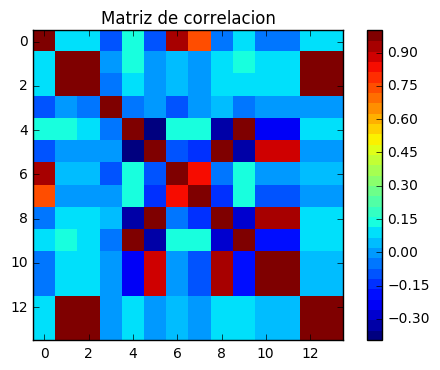

In [36]:
correlation_matrix(tabla_2_base(datos,economia[84:98],1))

In [ ]:
for k in range(look_back):
    temp_years = []
    for i in range(len(years)): 
        temp_years.append(years[i]-k)
temp_years

In [ ]:
t2 = pd.DataFrame.pivot_table(datos, values='Value', index=['CountryName', 'Year'], columns=['IndicatorCode']).loc[(paises,temp_years),economia[84:87]].sortlevel(["CountryName","Year"], ascending=[True,False])
t2.head()

### Fusionamos ambos DataFrame

In [ ]:
pd.DataFrame(np.column_stack([t1,t2])).head()

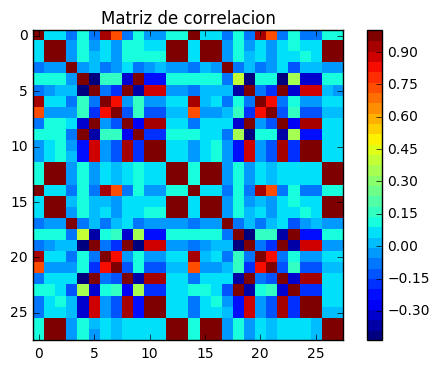

In [37]:
correlation_matrix(tabla_2_base(datos,economia[84:98],2))

## Tabla_2_Base

In [43]:
def tabla_2_base(datos,indicadores,look_back):
    temp_table = []
    for k in range(look_back):
        temp_years = []
        for i in range(len(years)): 
            temp_years.append(years[i]-k)
        temp_table.append(pd.DataFrame.pivot_table(datos, values='Value', index=['CountryName', 'Year'], columns=['IndicatorCode']).loc[(paises,temp_years),indicadores].sortlevel(["CountryName","Year"], ascending=[True,False]))
    return pd.DataFrame(np.column_stack(temp_table))

In [44]:
tabla_2_base(datos,economia[84:87],2).head()

,0,1,2,3,4,5
0,3.252725e+09,1.204713e+09,1.033890e+09,3.050780e+09,1.129918e+09,9.939385e+08
1,3.050780e+09,1.129918e+09,9.939385e+08,3.065955e+09,1.135539e+09,1.012090e+09
2,3.065955e+09,1.135539e+09,1.012090e+09,3.257308e+09,1.206410e+09,1.089944e+09
3,3.257308e+09,1.206410e+09,1.089944e+09,3.637845e+09,1.347350e+09,1.239080e+09
4,3.637845e+09,1.347350e+09,1.239080e+09,3.480987e+09,1.289254e+09,1.238200e+09


In [47]:
def iterador_global_2(datos,paises,years,indicadores_1,indicadores_2,look_back):
    
    t_1 = tabla_2_base(datos,indicadores_1,look_back)
    t_2 = tabla_base(paises,years,indicadores_2,datos)
    
    iterador = iter_R2_Splitter_v3(t_1,t_2)
    
    return iterador

In [48]:
iterador_global_2(datos,paises,years,economia[:50],agricultura[:],2)

C:\Program Files\Anaconda2\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Program Files\Anaconda2\lib\site-packages\sklearn\grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


,Original,Imputado
0,0.023326,-1.920724
1,0.272302,0.051969
2,-0.860261,-0.299686
3,0.810692,0.761366
4,0.557074,0.994240
5,0.000000,0.000000
6,1.000000,-0.000056
7,0.052718,-0.050674
8,-14.002445,-25.545886
9,0.511247,-0.774421


In [17]:
start_time = time.time()

resultado = []
look_back = 2

for i in range(len(conjunto)):
    resultado.append([conjunto_nombre[0],conjunto_nombre[i],porcentaje(iterador_global_2(datos,paises,years,conjunto[0],conjunto[i],look_back))])
    
print("--- %s seconds ---" % (time.time() - start_time))
pd.DataFrame(resultado, columns=["Base","Target","% > 90%"])

--- 99.3480000496 seconds ---


,Base,Target,% > 90%
0,GDP,GDP,0.466667
1,GDP,Gross,0.500000
2,GDP,GNI,0.266667


In [18]:
import plotly.plotly as py
import plotly.graph_objs as go

data = [go.Bar(
            x=['GDP', 'Gross', 'GNI'],
            y=np.array(resultado)[:,2]
    )]

py.iplot(data, filename='GDP')

In [19]:
start_time = time.time()

resultado = []
for i in range(len(conjunto)):
    for j in range(len(conjunto)):
        resultado.append([conjunto_nombre[i],conjunto_nombre[j],porcentaje(iterador_global_2(datos,paises,years,conjunto[i],conjunto[j],look_back))])
        
print("--- %s seconds ---" % (time.time() - start_time))
pd.DataFrame(resultado, columns=["Base","Target","% > 90%"])

--- 301.758999825 seconds ---


,Base,Target,% > 90%
0,GDP,GDP,0.066667
1,GDP,Gross,0.187500
2,GDP,GNI,0.266667
3,Gross,GDP,0.200000
4,Gross,Gross,0.218750
5,Gross,GNI,0.266667
6,GNI,GDP,0.400000
7,GNI,Gross,0.375000
8,GNI,GNI,0.333333


In [21]:
data = [
        go.Heatmap(
            z=np.array(resultado)[:,2],
            x=np.array(resultado)[:,1],
            y=np.array(resultado)[:,0],
            colorscale='Viridis'
        )
    ]
py.iplot(data, filename='Resultado Global')